#### Object Detection History 
1. One Stage Detector 
    - regional proposal + Classification 이 동시에 이루어 진다.  
    - Yolo , SSD, Retina Net

2. Two Stage Detector 
    - regional proposal + Classification 이 순차적으로 이루어 진다. 
    - RCNN, SPPNet, Fast RCNN, Faster-RCNN 

#### SSD(Single Shoot Detector) 
1. SSD Network Architecture 
    - VGGNet 16 
    - Extra Feature Layers 

2. SSD Network Element 
    - Multi Scale Feature Layer 
        - Sliding window 기반의 Image Scale 조정(Image Pyramid)에 따른 여러크기의 Object Detection 
        - 다른 크기의 Feature Map을 이용한 Object Detection 

    - **Dafault (Anchor) Box** 





#

In [14]:
import cv2 
import os
import sys 
import numpy as np 
import os.path as osp 
import torch 
import matplotlib.pyplot as plt

In [32]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2022-07-17 07:43:29--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2022-07-17 07:43:29 (9.03 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2022-07-17 07:43:29--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.

In [8]:
!pwd 

/content


In [5]:
!mkdir ./pretrained 

In [6]:

!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 
!wget -O ./pretrained/ssd_config_01.pbtxt  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
!tar -xvf ./pretrained/ssd_inception*.tar.gz -C ./pretrained 

--2022-07-17 06:42:15--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’

./pretrained/ssd_in 100%[===================>] 265.24M  29.6MB/s    in 9.0s    

2022-07-17 06:42:25 (29.6 MB/s) - ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

--2022-07-17 06:42:25--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

In [7]:
!pwd

/content


In [9]:
!ls -lia ./pretrained/ssd_inception*

6815750 -rw-r--r-- 1 root   root 278126337 Nov 18  2017 ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz

./pretrained/ssd_inception_v2_coco_2017_11_17:
total 201120
6815752 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 .
6815749 drwxr-xr-x 3 root   root      4096 Jul 17 06:42 ..
6815760 -rw-r----- 1 275875 5000        77 Nov 18  2017 checkpoint
6815755 -rw-r----- 1 275875 5000 101987441 Nov 18  2017 frozen_inference_graph.pb
6815756 -rw-r----- 1 275875 5000 100214372 Nov 18  2017 model.ckpt.data-00000-of-00001
6815753 -rw-r----- 1 275875 5000     18073 Nov 18  2017 model.ckpt.index
6815754 -rw-r----- 1 275875 5000   3701354 Nov 18  2017 model.ckpt.meta
6815757 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 saved_model


In [10]:
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                      '/content/pretrained/ssd_config_01.pbtxt')

In [21]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


(633, 806, 3)


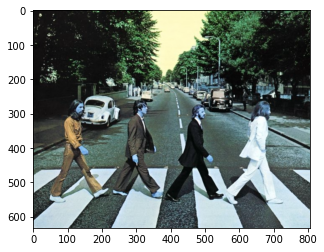

In [18]:
img = cv2.imread("/content/data/beatles01.jpg")
plt.imshow(img)
print(img.shape)

In [16]:
rows = img.shape[0]
cols = img.shape[1]
draw_img = img.copy()

In [23]:
cv_net.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
cv_out = cv_net.forward()
print(cv_out.shape)
green_color = (0, 255, 0)
red_color = (0, 0, 255)

(1, 1, 100, 7)


person 0.9696 1
person 0.9660 1
person 0.8916 1
person 0.6298 1
car 0.8609 3
car 0.7223 3
car 0.7184 3
car 0.7095 3
car 0.5949 3
car 0.5511 3


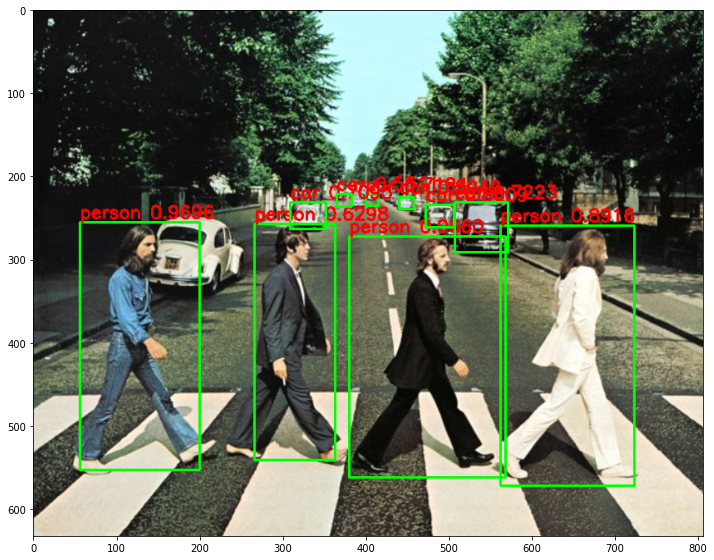

In [31]:
for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])

    if score > 0.4 : 
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols 
        bottom = detection[6] * rows 

        caption = "{} {:.4f}".format(labels_to_names[class_id], score)

        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)

        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)

        print(caption, class_id)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)


In [35]:
import time

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = img_array.copy()
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
    if is_print:
        print('Detection time:',round(time.time() - start, 2),"초")

    return draw_img

Detection time: 0.37 초


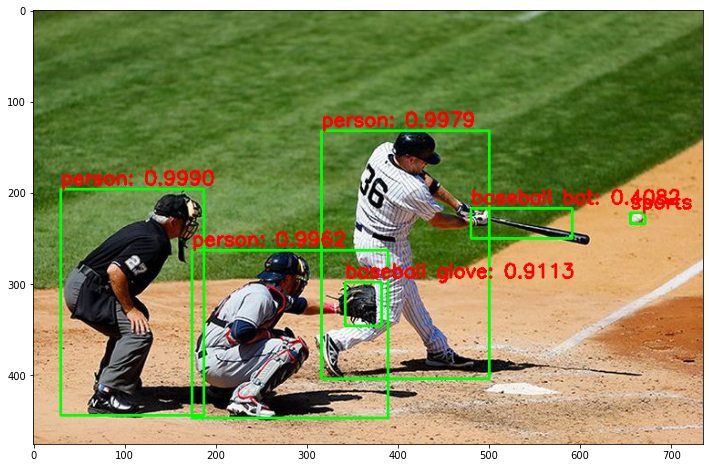

In [37]:
img = cv2.imread("/content/data/baseball01.jpg")

draw_img = get_detected_img(cv_net, img, score_threshold=0.4, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)